## ARIMA (AutoRegressive Integranted Moving Average)
- Autoregressive Integrated Moving Average는 개발된지 오래된 방법으로 시계열 데이터 분석을 위해 이해해야 하는 중요한 모델링 또는 예측 기법
- 지수평활 모델은 데이터의 추세와 계절성(seasonality)에 대한 설명에 기초하고, ARIMA 모델은 데이터에 나타나는 자기상관(autocorrelation)을 표현하는데 목적이 있다.
- ARIMA Model은 다음 한 Step만 예측가능 1년이면 다음 1년만 예측 가능 -> 즉 모델링은 계속 해줘야 되는 것.
- 위 것들의 하이퍼 파라미터들은 GridSearch 등을 이용해서 최적의 하이퍼 파라미터를 찾을 수 있음.
- **시계열이면 LSTM 써야 될 것 같고 그러는데, 경제쪽에서는 오히려 ARIMA 를 잘 씀**
- **Facebook - Prophet 도 잘 된다고 함.**

#### Stationary vs Non-stationary time series 
- ARIMA 는 데이터의 특성을 탄다.
- 데이터의 특성을 타는것이 기존 것과 다른점. (Stationary, Non-stationary 개념)

#### Seasonal vs Non-seasonal ARIMA
- Non-seasonal ARIMA : ARIMA(p,d,q)
- Seasonal ARIMA : ARIMA(p,d,q)(P,D,Q)m

#### 파라미터 -> 최소 3개 ~ 7개
- 기본 pdq (trend만 있다) / Seasonality도 있다 (P, D, Q) / 한 Season을 이루는 샘플갯수 m 까지
- ARIMA(p,d,q)(P,D,Q)m

## Stationary vs Non-Stationary
- ARIMA 는 Stationary 한 데이터 이여야 함.

### (1) Stationary 데이터 특성
- 연속되는 숫자들의 평균(mean)이 time invariant
- 연속되는 숫자들의 분산(variance)이 time invariant
- 연속되는 숫자들의 공분산이(convariance)이 time invariant

![Stationary](tsa_image/Stationary.png)

- 차례대로 평균, 분산, 공분산
- **Stationary 데이터는 평균, 분산, 공분산이 시점에 따라 달라지지 않는다. 즉 Trend가 없다는 것 = 최근에 많이 올라왔거나 그런느낌이 없는**
- **실제로 데이터가 저렇게 되진 않을꺼고 눈으로 알아보기도 힘들것 따라서 Test를 거쳐야 된다는 것!!**

### (2) Stationary Test
- ARIMA 모델은 시계열 데이터가 Stationary 특성을 보일 때 효과적이므로 데이터가 stationary 특성을 보이는지 확인할 수 있어야 함.
- p-value가 0.05 이하일때 유효하다고 볼 것.

### (3) Differencing
- Non-stationary 데이터는 differencing을 통해 stationary 하게 변환해줌.
- **differencing 한 데이터에 대해 stationary 할 때 까지 differencing을 반복함**
- **seaonal 데이터일 경우 season을 기준으로 differencing 함** 
    - 예로 1년 주기의 seasonaliy를 갖는 월간 데이터에 대해 differencing 할 때, differencing의 시간 단위는 1이 아니라 12
    - seasonal ARIMA 모델의 경우 1차 Ddifferencing 후 seasonal differencing 하는것도 흔히 사용하는 방법
    
- 단 differencing을 하는 만큼 앞에 데이터를 잃게 됨.
- differencing은 3차 이상은 하지 않음.
- **만약에 trend나 seasonality 있는 데이터라고 가정을 하고서 lag1, lag2를 뻇을 때 만약에 차이가 없다라고 하면은 -> 이건 가정이 틀린 것이기 때문에 3차 differencing 하지는 않음.**


<hr>

## AR (Autoregression Model) = 자기상관모델
- t시점의 데이터와 이전 시점 (t-p; lagged p)의 데이터 사이의 관계에 대한 회귀 모델(regression model)
- 내 스스로와의 correlation을 p시점에 대해서 계산하는 것이 ar

![ar_img.png](tsa_image/ar_img.png)

## MA (Moving Average - MA)
- t시점의 데이터 이전 시점(t-q) moving average의 residual 에 대한 회귀 모델
- **쉽게 말해서 MA는 다음것과 과거것을 뺴는데 그 의미가 residual 을 구하는 것. noise를 잡는 목적**

<hr>

# ARIMA Identification
## AutoCorrelation Plot vs Partial AutoCorrelation

### (1) AutoCorrelation
- **특정 시간만큼 지연된(lag) 시점의 데이터와의 연관성을 보여줌.**
- smooth하게 degrade하거나, 특정차수에서 강함을 보였다가 그다음부터 shap drop법? 하는 두가지 경우가 있음. 이에 따라 p를 결정한다고 함............
- stationary하고 causal하다는 가정 하에서 Auto-Regressive 또는 Moving average, 또는 두가지가 섞인 ARMA 모델을 사용할 수 있고, 모델의 order를 결정하기 위해서 ACF와 PACF를 사용할 수 있다.

### (2) Partial AutoCorrelation Plot
- **t시점과 특정 시간만큼 지연된(lag) 시점 t-p의 연관성을 보여준다. 단 그 사이의(t, t-p)데이터의 영향을 배제하고 보여준다.**

### (3) ACF - PACF Table
![acf_pacf_table.png](tsa_image/acf_pacf_table.png)

- ACF와 PACF의 특성을 보고 P와 Q를 구해라
- ex)ACF가 Zero를 향해서 천천히 내려가는 경우, PACF가 cutoff되는 시점을 AR의 p로 해라
- 사실 요 기준가지고는 힘들고, 계속 try 해보면서 진행해서 최적의 p,q를 찾아야 함.
- p하나 늘려보고 모델만들고, q하나 늘려보고 residual에 대한 autocorrelation이 범위 안에 들어오면 됨.

![acf_pacf.png](tsa_image/acf_pacf.png)
- ACF는 lag가 증가할수록 decay 혹은 tail-off 모습을 보입니다. PACF는 lag=1일때 강한 스파이크를 보이고 이후 값들은 제로에 가까운 값들을 보입니다


# ARIMA and Seasonal ARIMA
## Autoregressive Integrated Moving Averages

일반적으로 다음 프로세스를 따라 ARIMA 모델을 만듭니다:
* 시계열 데이터 시각화
* 시계열 데이터를 stationary 특성화
* Correlation 과 AutoCorrelation 챠트 플로팅
* ARIMA 모델 생성
* 만들어진 모델로 예측 수행

순서대로 다뤄봅시다.

## Step 1: 데이터 읽기와 포매팅

월별 우유 소비 데이터를 사용합니다. 데이터는 [Data Market](https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line) 에서 다운받아 저장해놓은 CSV 파일을 읽습니다.

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

# 소 한마리가 우유를 얼마만큼 생산했는지에 대한 데이터
df = pd.read_csv('tsa_data/monthly-milk-production.csv', index_col='Month', parse_dates=True)
df.head()

,pounds per cow
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


## Step 2: Visualize the Data

pandas 내장 플로팅 함수들로 시계열 데이터를 시각화 해봅니다.

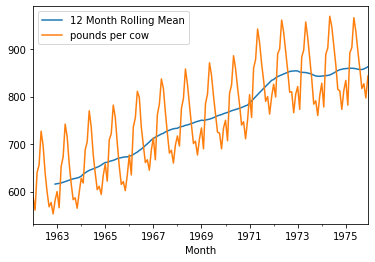

In [5]:
# Stationary하게 만든다고 trend와 seasonality를 없애 버리면 나중에 데이터 보는게 힘들어짐.


timeseries = df['pounds per cow']

timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.plot()
plt.legend()

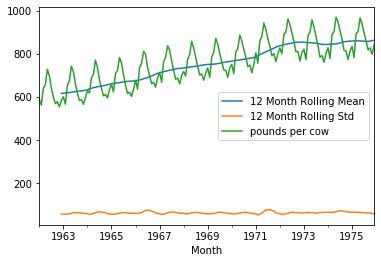

In [6]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

## Decomposition

ETS decomposition 을 통해서 시계열 데이터를 구성하는 요소들을 확인할 수 있습니다.

<Figure size 432x288 with 0 Axes>

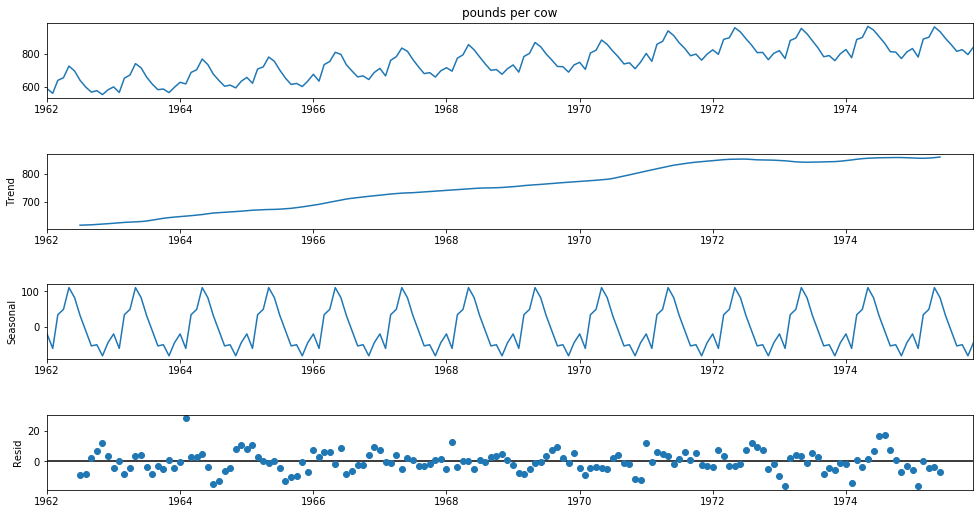

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['pounds per cow'])

fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15,8)

- **trend확실하고 seaonality가 확실함을 알 수 있음**
- 우리는 Residual을 통해 알아내야 함.

## Testing for Stationarity

시계열 데이터의 Stationarity 특성을 시험하기 위해 Augmented [Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) [unit root test](https://en.wikipedia.org/wiki/Unit_root_test) 를 사용합니다.

Augmented Dicky-Fuller (ADF) test 는 시계열 데이터 샘플에 단위근(unit root)이 존재한다는 귀무가설을 시험하므로써 대립가인 stationarity 또는 trend-stationarity 여부를 확인합니다. 

시계열 데이터에 unit root 가 있어 non-stationary 하다는 귀무가설 H0 를 accept 할지, 또는 이를 reject 하면서 시계열 데이터에 unit root 가 없고 stationary 하다는 대립가설을 채택할지를 실험하는 것입니다.

결국 결과값 p-value 로 결정하게 됩니다.

* p-value 값이 작을 때 (≤ 0.05) 귀무가설을 reject 하고 데이터는 stationary 함

* p-value 값이 클 (> 0.05) 귀무가설을 accept 하고 데이터는 non-stationary 함

가공한 데이터에 ADF 테스트를 해봅시다:

In [9]:
from statsmodels.tsa.stattools import adfuller

# Stationary 를 검사하는 함수 - adfuller
result = adfuller(df['pounds per cow']) # Series 넘겨주면 됨.
result

(-1.3038115874221246,
 0.627426708603034,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

- -> 두번째 항목이 0.05이하가 되면 됨.

In [12]:
# Stationary의 p-value 검사하는 함수
def adf_check(ts):
    result = adfuller(ts)
    if result[1] <= 0.05:
        print('Stationary {}'.format(result[1]))
    else:
        print('Non-Stationary {}'.format(result[1]))
        
adf_check(df['pounds per cow'])

Non-Stationary 0.627426708603034


### ==> **differencing을 진행하고 그 결과가 다시 Stationary를 띄는지 확인하면 되는 것 !!!!**

## Differencing
시계열 데이터에 대한 1차(first) difference 는 다음 스탭으로의 한 차원(시간단위) 만큼의 변화값의 series 입니다. pandas 를 이용하면 아주 differencing 할 수 있습니다. 2차, 3차, 그보다 더 높은 차원의 differencing 을 시도해보고 stationary 한 차원을 찾습니다.

### First Difference

In [13]:
# First Difference
df['1st diff'] = df['pounds per cow'] - df['pounds per cow'].shift(1)
df.head()

,pounds per cow,1st diff
Month,,
1962-01-01,589,NaN
1962-02-01,561,-28.0
1962-03-01,640,79.0
1962-04-01,656,16.0
1962-05-01,727,71.0


Stationary 0.03006800400178688


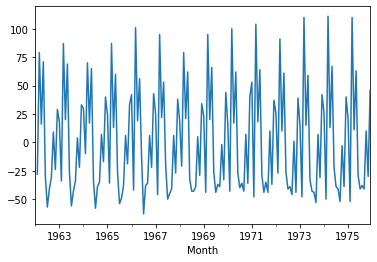

In [15]:
# na 값 버리고(그래프 만들려면 na 없어야 함) 그래프 만듬
adf_check(df['1st diff'].dropna()) # Stationary 값 안정화 궤도에 들어왔음
df['1st diff'].plot()

- **분산도 어느정도 일정해지고 trend 도 upward도 아니고 downward도 아니니까 괜찮은 듯**
- **Stationary도 0.05 이하로 내려갔음.**
- 한번더 진행해봄 = Second Differencing

### Second Differencing

Stationary 1.1126989332083069e-26


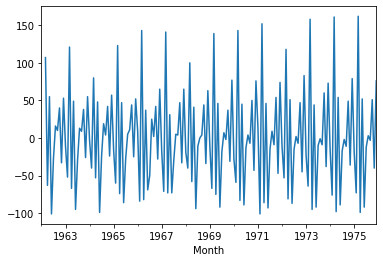

In [16]:
# Second differencing 진행
df['2nd diff'] = df['1st diff'] - df['1st diff'].shift(1)

# na 값 버리고(그래프 만들려면 na 없어야 함) 그래프 만듬
adf_check(df['2nd diff'].dropna()) # Stationary 정도 확인 -> p-value
df['2nd diff'].plot()

- **Stationary가 아까보다 더 내려갔음.**
- Seasonal에 대해서도 확인해봄

### Seasonal Difference

Non-Stationary 0.16079880527711304


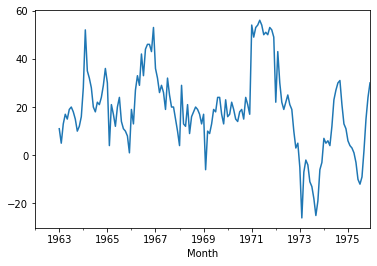

In [19]:
# Seasonal Difference에 대해서 진행
df['seasonal diff'] = df['pounds per cow'] - df['pounds per cow'].shift(12)

adf_check(df['seasonal diff'].dropna()) # Stationary 확인
df['seasonal diff'].plot() 

- **Non-stationary한 결과가 나옴.**
- **원래 Stationary했던 1st diff에서 seasonal differencing 진행 해봄. (1차 된거에 seasonal 하는것도 방법)**

### Seasonal First Difference
- 1st differencing 한것에서 seasonal differencing 해봄.

Stationary 1.86542343187882e-05


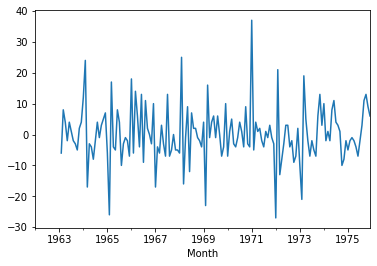

In [21]:
# 1st diff - seasonal
df['seasonal 1st diff'] = df['1st diff'] - df['1st diff'].shift(12)

adf_check(df['seasonal 1st diff'].dropna()) # Stationary 확인

df['seasonal 1st diff'].plot()

- **조금 튀긴 하지만 mean도 일정해보이고 variance 분산도 크지 않은 것을 알 수 있음.**
- Stationary 도 확인됨.
- **d=1, D=1 로 파라미터를 쓰면 되겠다고 결과가 나옴. (trend 1, Seasonal 1)**

# Autocorrelation and Partial Autocorrelation Plots

ARIMA 의 p,q 파라메터를 찾기 위해 PACF 와 ACF 플롯을 참조합니다.

플롯에 대한 해석은 간단하지만은 않은데, [여기](http://people.duke.edu/~rnau/arimrule.htm) 와 [여기](https://people.duke.edu/~rnau/411arim3.htm) 에 ACF 와 PACF 를 해석하는 방법에 대한 정보가 자세히 나와있으니 참고하십시오. 

### Autocorrelation Interpretation

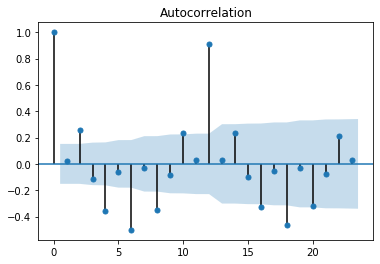

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['1st diff'].dropna());

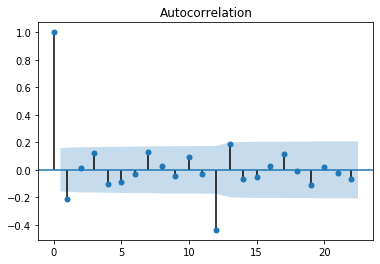

In [23]:
plot_acf(df['seasonal 1st diff'].dropna());

## Partial Autocorrelation

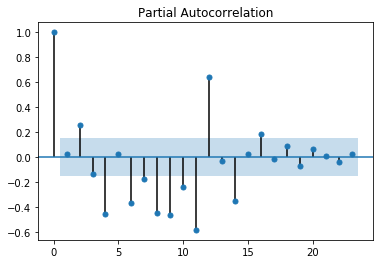

In [24]:
plot_pacf(df['1st diff'].dropna(), method='ywm');

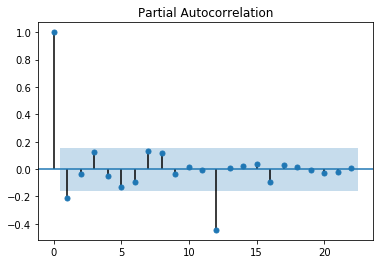

In [25]:
plot_pacf(df['seasonal 1st diff'].dropna(), method='ywm');

### Autocorrelation 과 Partial Autocorrelation 에 대한 요약

* AR 모델 판별은 대체로 PACF 를 통해 확인할 수 있습니다.
    * 이론적으로 PACF 는 AR 모델의 차수 이후 "shut off" 를 보입니다. "shut off"  되었다는 것은 partial autocorrelation 이 해당 지점 이후 0 과 같다는 의미입니다. 다른 말로, 0 아닌 partial autocorrelation 이 존재하는 차수가 AR 모델의 차수가 됩니다. 
    
* MA 모델에 대한 판별은 PACF 보다 ACF 더 명확히 확인됩니다.
    * MA 모델에 있어서 PACF 는 "shut off" 하지 않지만 0 을 향해 점진적으로 줄어듭니다. ACF 에 MA 모델이 좀 더 분명히 나타나는데, 모델과 관련된 lag 에 대해서만 0 아닌 autocorrelation 이 나타납니다.
    
## Seasonal ARIMA 모델 사용하기

In [27]:
model = sm.tsa.statespace.SARIMAX(df['pounds per cow'],
                                 order=(0,1,0),
                                 seasonal_order=(1,1,1,12))

result = model.fit()

print(result.summary())

c:\users\urse\anaconda3\envs\untitled\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\urse\anaconda3\envs\untitled\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                       pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Sat, 13 Jun 2020   AIC                           1074.131
Time:                                      18:12:53   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

## AIC & BIC
- AIC와 BIC가 제일 중요.

- 보통 현장 연구자들은 P-value와 신뢰구간을 사용할 일이 가장 많지만, 간혹 가다가 AIC나 BIC라고 부르는 녀석들을 사용할 일도 생기곤 합니다. 이것들은 가설검정이 아닌 모형비교 model selection 를 위한 도구로서, 통계 모형들이 자료를 얼마나 잘 설명하는지를 모형 자체의 "복잡도" model complexity 를 고려하여 수량화한 것


- AIC와 BIC는 대표적인 모형비교 기준들입니다. AIC는 Akaike Information Criterion 의 약자고 BIC는 Bayesian Information Criterion의 약자입니다. 아무튼 둘 다 'information criterion'의 일종이라는 것을 알 수 있죠. [1] 이 값들이 작은 모형이 큰 모형보다 상대적으로 좋은 모형입니다

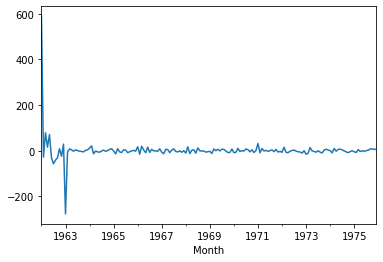

In [29]:
# 계속 fit하면서 residual 을 줄여 나갔다는 것에 대한 그래프 
# 나중갈수록 점점 없어짐.
result.resid.plot()


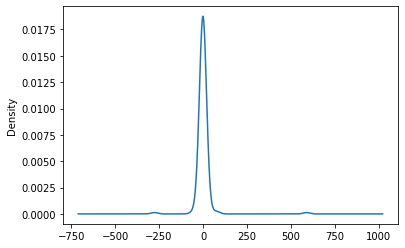

In [28]:
# kde분포로 보면 가우시안 분포를 띄움. 어느곳에 bias되지 않고 잘 줄여나간 모델 fitting이 잘 되었다는 것
result.resid.plot(kind='kde')

## Prediction of Future Values

일단 생성된 모델이 이미 알고 있는 결과 대비 얼마나 좋은 예측 성능을 보여주는지 확인해봅시다:

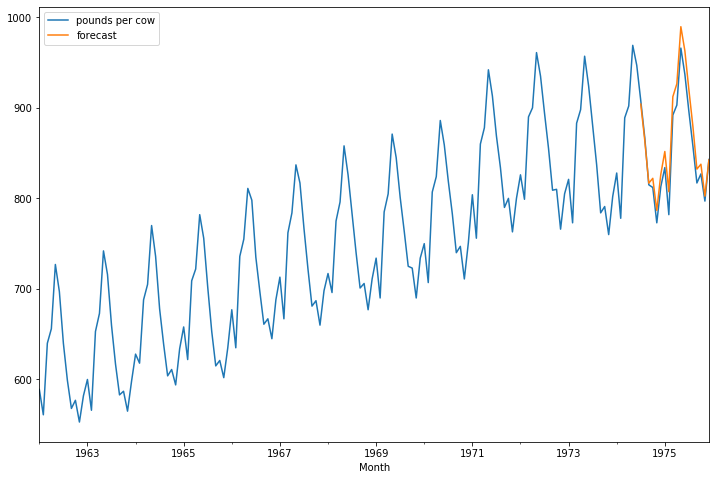

In [30]:
df['forecast'] = result.predict(start=150, end=168, dynamic=True)

df[['pounds per cow', 'forecast']].plot(figsize=(12,8))

- **중간에 뾰족한 부분은 trend를 따라가느라 뾰족한거긴 한데 어느정도 잘 따라감을 알 수 있음**

## 출처
- https://www.youtube.com/watch?v=kbn0hf7t8MI&list=PL9mhQYIlKEhd60Qq4r2yC7xYKIhs97FfC&index=6

## 참고문헌
- https://otexts.com/fppkr/arima.html